C:\Users\Bob\AppData\Local\Temp\ipykernel_19092\263710967.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/complaints.csv")


📊 Data Shape: (9609797, 18)

🧾 Column Preview:
Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

🧼 Null Values (Top 5):
Tags                            8981029
Consumer disputed?              8841498
Consumer complaint narrative    6629041
Company public response         4770207
Consumer consent provided?      1649561
dtype: int64


C:\Users\Bob\AppData\Local\Temp\ipykernel_19092\263710967.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.index, y=product_counts.values, palette="Blues_d")


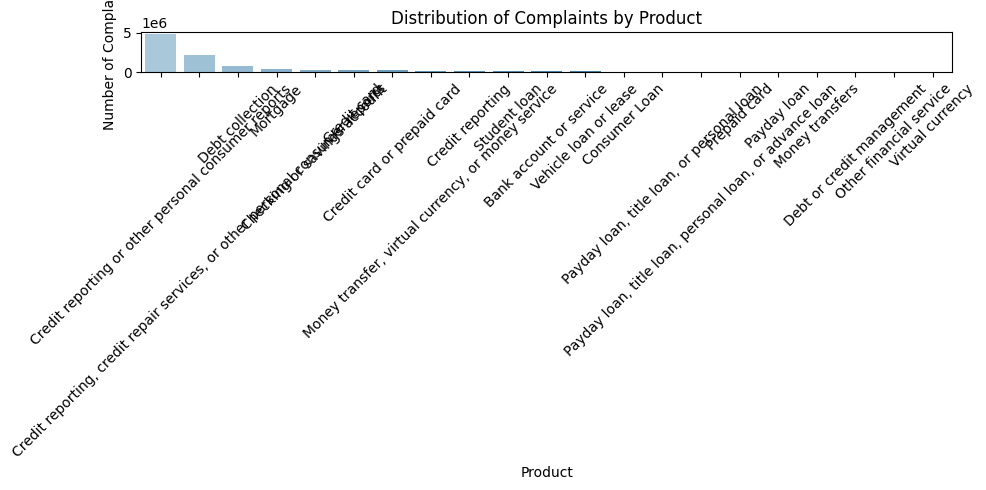

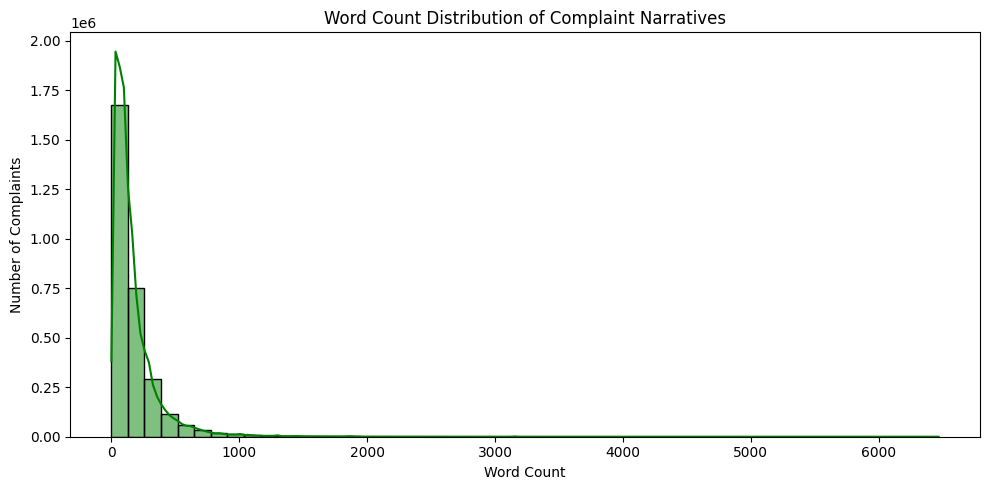

C:\Users\Bob\AppData\Local\Temp\ipykernel_19092\263710967.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["With Narrative", "Without Narrative"], y=[has_narrative, no_narrative], palette="Set2")


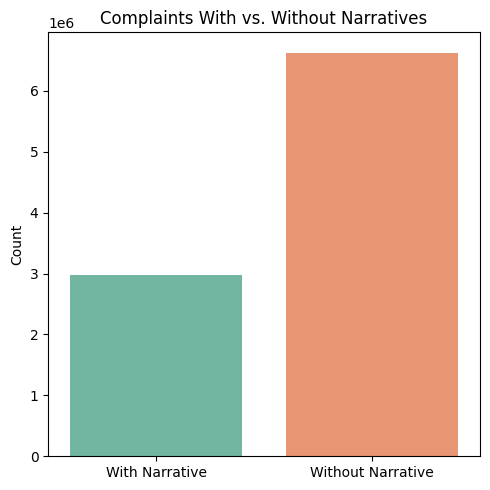

📝 Complaints with narratives: 2,980,756
🚫 Complaints without narratives: 6,629,041
📊 Percent with narrative: 31.02%


<Axes: xlabel='Product'>

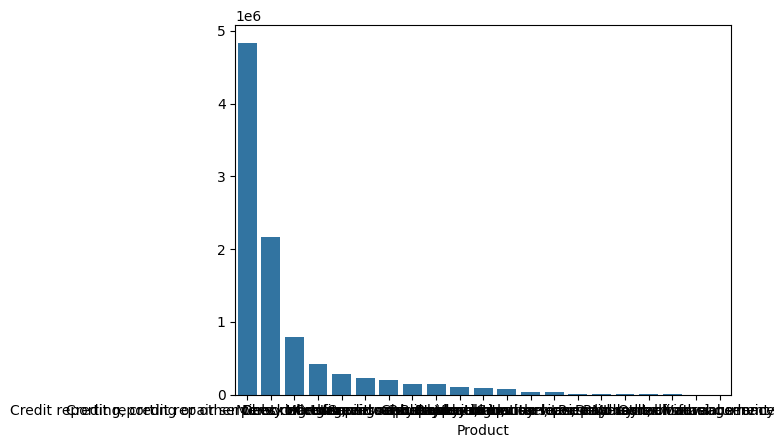

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (update with your actual path if different)
df = pd.read_csv("../data/raw/complaints.csv")


# ----------------------------
# 1. Basic Info
# ----------------------------
print("📊 Data Shape:", df.shape)
print("\n🧾 Column Preview:")
print(df.columns)

print("\n🧼 Null Values (Top 5):")
print(df.isnull().sum().sort_values(ascending=False).head(5))

# ----------------------------
# 2. Distribution across Products
# ----------------------------
product_counts = df["Product"].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=product_counts.index, y=product_counts.values, palette="Blues_d")
plt.title("Distribution of Complaints by Product")
plt.xticks(rotation=45)
plt.ylabel("Number of Complaints")
plt.xlabel("Product")
plt.tight_layout()
plt.show()

# ----------------------------
# 3. Word Count in Complaint Narratives
# ----------------------------
# Create new column for word count
df["narrative_word_count"] = df["Consumer complaint narrative"].astype(str).apply(lambda x: len(x.split()))

# Drop rows with null narrative if needed
narratives = df.dropna(subset=["Consumer complaint narrative"])

# Plot distribution of word counts
plt.figure(figsize=(10,5))
sns.histplot(data=narratives, x="narrative_word_count", bins=50, kde=True, color='green')
plt.title("Word Count Distribution of Complaint Narratives")
plt.xlabel("Word Count")
plt.ylabel("Number of Complaints")
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Count Complaints With vs. Without Narratives
# ----------------------------
has_narrative = df["Consumer complaint narrative"].notnull().sum()
no_narrative = df["Consumer complaint narrative"].isnull().sum()

plt.figure(figsize=(5,5))
sns.barplot(x=["With Narrative", "Without Narrative"], y=[has_narrative, no_narrative], palette="Set2")
plt.title("Complaints With vs. Without Narratives")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Print stats
print(f"📝 Complaints with narratives: {has_narrative:,}")
print(f"🚫 Complaints without narratives: {no_narrative:,}")
print(f"📊 Percent with narrative: {has_narrative / len(df) * 100:.2f}%")




product_counts = df["Product"].value_counts()
sns.barplot(x=product_counts.index, y=product_counts.values)



In [5]:
# Count complaints per product
product_counts = df["Product"].value_counts()

# Total complaints
total_complaints = df.shape[0]

# Generate text summary
print("📊 Complaint Distribution by Product:\n")

for product, count in product_counts.items():
    percentage = (count / total_complaints) * 100
    print(f"- {product}: {count:,} complaints ({percentage:.2f}%)")

# Optional: summarize top 3
top_products = product_counts.head(3)
print("\n🏆 Top 3 most complained-about products:")
for product, count in top_products.items():
    print(f"  → {product}: {count:,} complaints")


📊 Complaint Distribution by Product:

- Credit reporting or other personal consumer reports: 4,834,855 complaints (50.31%)
- Credit reporting, credit repair services, or other personal consumer reports: 2,163,857 complaints (22.52%)
- Debt collection: 799,197 complaints (8.32%)
- Mortgage: 422,254 complaints (4.39%)
- Checking or savings account: 291,178 complaints (3.03%)
- Credit card: 226,686 complaints (2.36%)
- Credit card or prepaid card: 206,369 complaints (2.15%)
- Money transfer, virtual currency, or money service: 145,066 complaints (1.51%)
- Credit reporting: 140,429 complaints (1.46%)
- Student loan: 109,717 complaints (1.14%)
- Bank account or service: 86,205 complaints (0.90%)
- Vehicle loan or lease: 72,957 complaints (0.76%)
- Consumer Loan: 31,574 complaints (0.33%)
- Payday loan, title loan, or personal loan: 30,641 complaints (0.32%)
- Payday loan, title loan, personal loan, or advance loan: 16,514 complaints (0.17%)
- Prepaid card: 15,280 complaints (0.16%)
- Payday

In [6]:
# Drop null narratives first
narratives = df.dropna(subset=["Consumer complaint narrative"]).copy()

# Create word count column
narratives["word_count"] = narratives["Consumer complaint narrative"].apply(lambda x: len(str(x).split()))

# ----------------------------
# Summary statistics
# ----------------------------
min_words = narratives["word_count"].min()
max_words = narratives["word_count"].max()
avg_words = narratives["word_count"].mean()
median_words = narratives["word_count"].median()
short_count = (narratives["word_count"] <= 10).sum()
long_count = (narratives["word_count"] >= 250).sum()
total = len(narratives)

# ----------------------------
# Text summary
# ----------------------------
print("📝 Complaint Narrative Word Count Summary:\n")
print(f"- Total complaints analyzed: {total:,}")
print(f"- Minimum words in a narrative: {min_words}")
print(f"- Maximum words in a narrative: {max_words}")
print(f"- Average word count: {avg_words:.2f}")
print(f"- Median word count: {median_words}")
print(f"- Complaints with very short narratives (≤ 10 words): {short_count:,} ({short_count / total * 100:.2f}%)")
print(f"- Complaints with very long narratives (≥ 250 words): {long_count:,} ({long_count / total * 100:.2f}%)")


📝 Complaint Narrative Word Count Summary:

- Total complaints analyzed: 2,980,756
- Minimum words in a narrative: 1
- Maximum words in a narrative: 6469
- Average word count: 175.60
- Median word count: 114.0
- Complaints with very short narratives (≤ 10 words): 27,685 (0.93%)
- Complaints with very long narratives (≥ 250 words): 586,062 (19.66%)


In [7]:
# Total number of complaints
total = len(df)

# Count complaints with and without narratives
with_narrative = df["Consumer complaint narrative"].notnull().sum()
without_narrative = df["Consumer complaint narrative"].isnull().sum()

# Calculate percentages
with_pct = (with_narrative / total) * 100
without_pct = (without_narrative / total) * 100

# Print summary
print("📋 Narrative Presence Summary:\n")
print(f"- Total complaints: {total:,}")
print(f"- Complaints with narratives: {with_narrative:,} ({with_pct:.2f}%)")
print(f"- Complaints without narratives: {without_narrative:,} ({without_pct:.2f}%)")


📋 Narrative Presence Summary:

- Total complaints: 9,609,797
- Complaints with narratives: 2,980,756 (31.02%)
- Complaints without narratives: 6,629,041 (68.98%)


✅ Python Code to Filter for Project Scope:

In [13]:
# Define the 5 target products for the project
updated_targets = [
    "Credit card",
    "Money transfers",
    "Money transfer, virtual currency, or money service",
    "Payday loan, title loan, or personal loan",
    "Checking or savings account"
]


# Filter the dataset
filtered_df = df[
    (df["Consumer complaint narrative"].notnull()) &
    (df["Product"].isin(target_products))
].copy()

# Show result
print("✅ Filtered Dataset Summary:")
print(f"- Total rows after filtering: {filtered_df.shape[0]:,}")
print(f"- Remaining products: {filtered_df['Product'].unique().tolist()}")


✅ Filtered Dataset Summary:
- Total rows after filtering: 318,174
- Remaining products: ['Credit card', 'Checking or savings account', 'Money transfer, virtual currency, or money service']


In [ ]:
print("📦 Unique Product Categories in Dataset:\n")
print(df["Product"].dropna().unique())



📦 Unique Product Categories in Dataset:

['Credit reporting or other personal consumer reports' 'Debt collection'
 'Credit card' 'Checking or savings account'
 'Money transfer, virtual currency, or money service'
 'Vehicle loan or lease' 'Debt or credit management' 'Mortgage'
 'Payday loan, title loan, personal loan, or advance loan' 'Prepaid card'
 'Student loan' 'Credit reporting'
 'Credit reporting, credit repair services, or other personal consumer reports'
 'Credit card or prepaid card' 'Payday loan, title loan, or personal loan'
 'Bank account or service' 'Money transfers' 'Consumer Loan' 'Payday loan'
 'Other financial service' 'Virtual currency']


✅ Final Clean Filter for Non-Empty Narratives

In [14]:
# Remove records with null or empty complaint narratives (after stripping spaces)
filtered_df = filtered_df[filtered_df["Consumer complaint narrative"].str.strip().astype(bool)]

# Confirm shape after filtering
print("✅ Final dataset shape after removing empty narratives:", filtered_df.shape)


✅ Final dataset shape after removing empty narratives: (318174, 19)


🧼 Cleaned Text Column Code:



In [15]:
import re

# Define boilerplate phrases to remove (customize as needed)
boilerplate_phrases = [
    "i am writing to file a complaint",
    "this is a complaint",
    "dear cfpb",
    "to whom it may concern",
    "cfpb complaint"
]

def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r"http\S+|www\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-z\s]", "", text)  # remove punctuation/numbers
    text = re.sub(r"\s+", " ", text).strip()  # remove extra spaces

    # Remove boilerplate phrases
    for phrase in boilerplate_phrases:
        text = text.replace(phrase, "")

    return text.strip()

# Apply cleaning function
filtered_df["cleaned_narrative"] = filtered_df["Consumer complaint narrative"].apply(clean_text)

# Preview
print("✅ Cleaned sample:")
print(filtered_df["cleaned_narrative"].iloc[0][:300])  # Preview first 300 chars


✅ Cleaned sample:
a xxxx xxxx card was opened under my name by a fraudster i received a notice from xxxx that an account was just opened under my name i reached out to xxxx xxxx to state that this activity was unauthorized and not me xxxx xxxx confirmed this was fraudulent and immediately closed the card however they


In [17]:
filtered_df.to_csv("../data/filtered_complaints.csv", index=False)
